In [1]:
import sys
!{sys.executable} -m pip install matplotlib seaborn pandas numpy openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [9]:
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [10]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [13]:
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score
0     12346.0      326          1  77183.60  1  1  5       115
1     12347.0        2          7   4310.00  5  5  5       555
2     12348.0       75          4   1797.24  2  4  4       244
3     12349.0       19          1   1757.55  4  1  4       414
4     12350.0      310          1    334.40  1  1  2       112

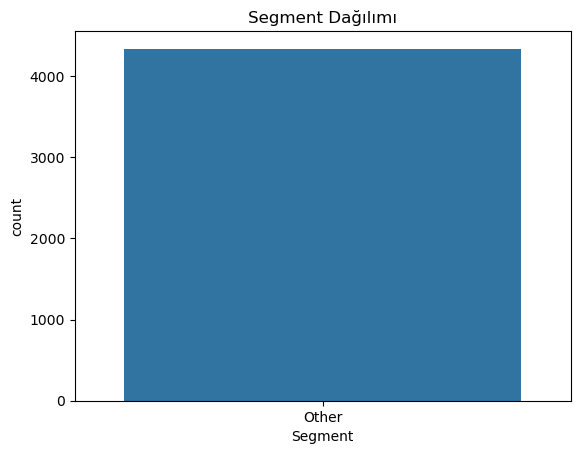

In [14]:
rfm['Segment'] = 'Other'
rfm.loc[(rfm['R']=='5') & (rfm['F']=='5'), 'Segment'] = 'Champions'

sns.countplot(data=rfm, x='Segment')
plt.title("Segment Daƒüƒ±lƒ±mƒ±")
plt.show()

In [15]:
def segment_label(rfm_score):
    if rfm_score == '555':
        return 'Champions'
    elif rfm_score[0] in ['4','5'] and rfm_score[1] in ['4','5']:
        return 'Loyal Customers'
    elif rfm_score[0] == '5' and rfm_score[2] in ['4','5']:
        return 'Big Spenders'
    elif rfm_score[0] in ['3','4'] and rfm_score[1] in ['1','2']:
        return 'Potential Loyalist'
    elif rfm_score[0] in ['1','2'] and rfm_score[1] in ['4','5']:
        return 'At Risk'
    elif rfm_score == '111':
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_label)
rfm.head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score  \
0     12346.0      326          1  77183.60  1  1  5       115   
1     12347.0        2          7   4310.00  5  5  5       555   
2     12348.0       75          4   1797.24  2  4  4       244   
3     12349.0       19          1   1757.55  4  1  4       414   
4     12350.0      310          1    334.40  1  1  2       112   
5     12352.0       36          8   2506.04  3  5  5       355   
6     12353.0      204          1     89.00  1  1  1       111   
7     12354.0      232          1   1079.40  1  1  4       114   
8     12355.0      214          1    459.40  1  1  2       112   
9     12356.0       23          3   2811.43  4  3  5       435   

              Segment  
0              Others  
1           Champions  
2             At Risk  
3  Potential Loyalist  
4              Others  
5              Others  
6                Lost  
7              Others  
8              Others  
9              Others

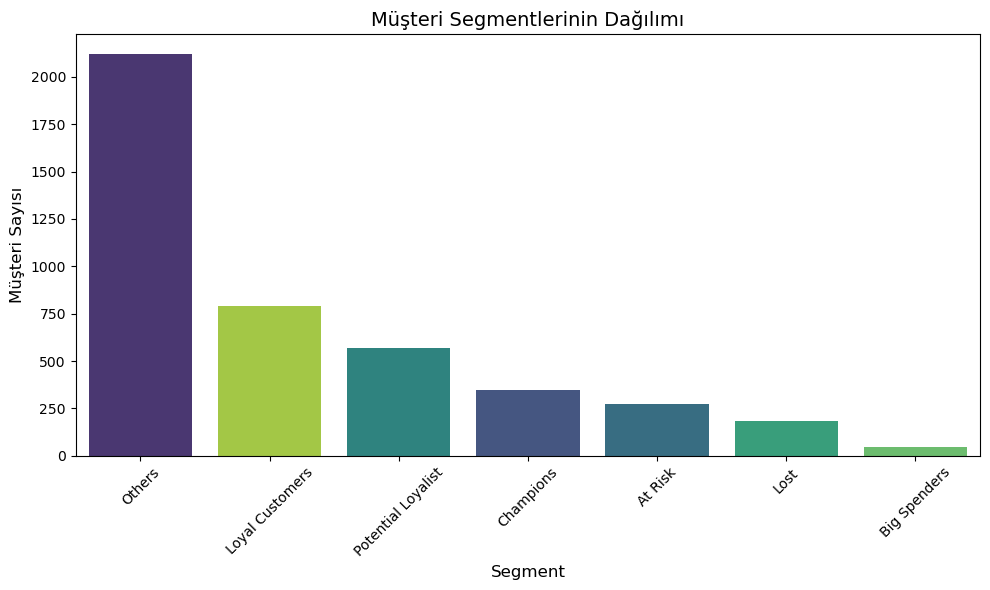

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x='Segment', hue='Segment', order=rfm['Segment'].value_counts().index, palette="viridis", legend=False)
plt.title('M√º≈üteri Segmentlerinin Daƒüƒ±lƒ±mƒ±', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('M√º≈üteri Sayƒ±sƒ±', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

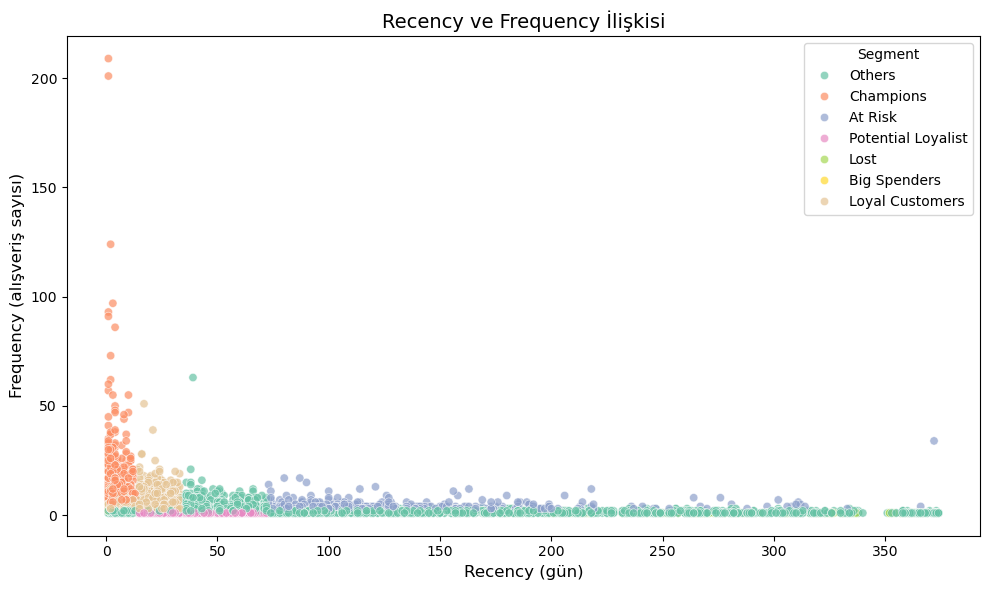

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
plt.title('Recency ve Frequency ƒ∞li≈ükisi', fontsize=14)
plt.xlabel('Recency (g√ºn)', fontsize=12)
plt.ylabel('Frequency (alƒ±≈üveri≈ü sayƒ±sƒ±)', fontsize=12)
plt.legend(title='Segment', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### üéØ Segment: Champions
**Tanƒ±m:** En son alƒ±≈üveri≈üini yapmƒ±≈ü, sƒ±k alƒ±≈üveri≈ü yapan, y√ºksek harcayanlar  
**Strateji:**  
- VIP sadakat programƒ±  
- Yeni √ºr√ºnlerde ilk sen! ‚Üí Erken eri≈üim kampanyalarƒ±  
- Ki≈üiselle≈ütirilmi≈ü teklifler & te≈üekk√ºr mesajlarƒ±  
- Arkada≈ü davetinde ekstra √∂d√ºl

---

### üß° Segment: Loyal Customers
**Tanƒ±m:** Sƒ±k alƒ±≈üveri≈ü yapan, d√ºzenli m√º≈üteriler  
**Strateji:**  
- Puan toplama sistemi  
- Kargo bedava veya ikinci √ºr√ºnde %50 indirim  
- √áapraz satƒ±≈ü (tamamlayƒ±cƒ± √ºr√ºn √∂nerisi)  
- E-posta ile haftalƒ±k √∂neriler

---

### üí∞ Segment: Big Spenders
**Tanƒ±m:** Az alƒ±≈üveri≈ü ama y√ºksek tutarlar  
**Strateji:**  
- Premium √ºr√ºn odaklƒ± √∂neriler  
- Concierge hizmeti veya √∂zel m√º≈üteri temsilcisi  
- Kƒ±sƒ±tlƒ± sayƒ±da √∂zel koleksiyonlara eri≈üim  
- Y√ºksek b√ºt√ßeli kampanyalar i√ßin √∂zel indirim

---

### üå± Segment: Potential Loyalist
**Tanƒ±m:** Sadƒ±k hale gelmeye yakƒ±n m√º≈üteriler  
**Strateji:**  
- Ho≈ü geldin kuponlarƒ±  
- Abonelik avantajlarƒ± tanƒ±tƒ±mƒ±  
- Alƒ±≈üveri≈ü sonrasƒ± takip e-mail akƒ±≈üƒ±  
- Sadakat puanƒ± ba≈ülatma

---

### üîï Segment: At Risk
**Tanƒ±m:** √ñnceden aktif ama artƒ±k sessizle≈ümi≈ü  
**Strateji:**  
- ‚ÄúSeni √∂zledik‚Äù kampanyasƒ± (%20 d√∂n√º≈ü indirimi)  
- Son alƒ±≈üveri≈üine g√∂re √∂zel √∂neriler  
- Anket ile geri bildirim + indirim  
- Zaman sƒ±nƒ±rlƒ± teklifler

---

### ‚ö†Ô∏è Segment: Lost
**Tanƒ±m:** √áok uzun s√ºredir alƒ±≈üveri≈ü yapmayan  
**Strateji:**  
- Geri kazanƒ±m kampanyalarƒ± (‚ÄúBirlikte g√ºzel g√ºnlerimiz oldu‚Äù)  
- Drip e-posta serisi (hatƒ±rlatma ‚Äì te≈üvik ‚Äì √ß√∂z√ºm)  
- Anket + indirim kombinasyonu  
- Yeni ba≈ülayanlara √∂zel teklifler ile yeniden kazanƒ±m

---

### üî¨ Segment: Others
**Tanƒ±m:** Hen√ºz sƒ±nƒ±flanamayan kullanƒ±cƒ±lar  
**Strateji:**  
- A/B testlerinin hedef kitlesi  
- Yeni kampanya denemeleri i√ßin pilot grup  
- Segment dƒ±≈üƒ± ileti≈üim ‚Äì ke≈üif odaklƒ± strateji